In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("/content/housing_prices.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: ylabel='price'>

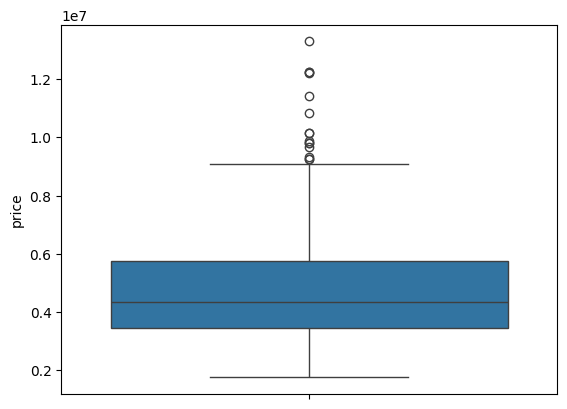

In [71]:
sns.boxplot(df['price'])

<Axes: ylabel='area'>

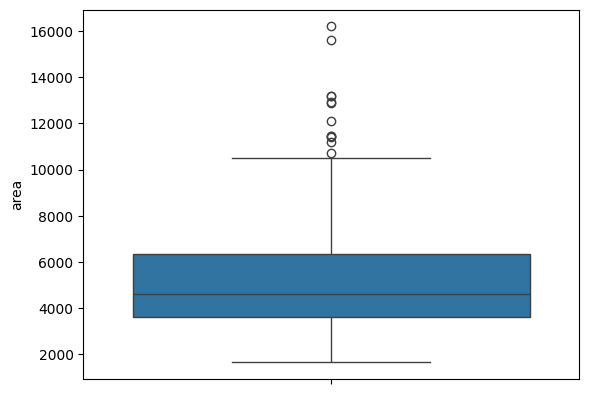

In [72]:
sns.boxplot(df['area'])

<Axes: ylabel='stories'>

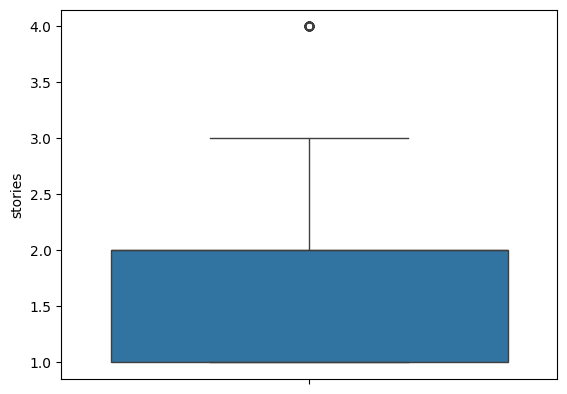

In [73]:
sns.boxplot(df['stories'])

<Axes: ylabel='bedrooms'>

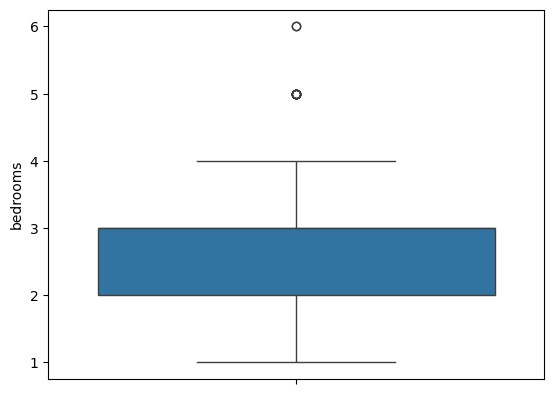

In [74]:
sns.boxplot(df['bedrooms'])

<Axes: ylabel='parking'>

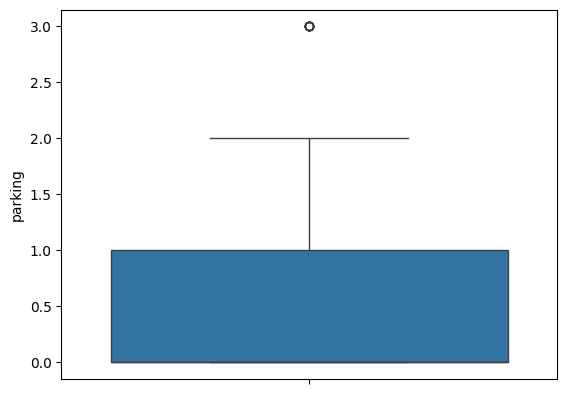

In [75]:
sns.boxplot(df['parking'])

In [76]:
col=['price','area']
from scipy.stats import zscore
for i in col:
  df[i]=np.abs(zscore(df[i]))


In [77]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.770956,0.784818,2.965138,1.286239,1.805505,0.693578
std,0.637474,0.620296,0.738064,0.502470,0.867492,0.861586
min,0.000145,0.000250,1.000000,1.000000,1.000000,0.000000
25%,0.303271,0.391790,2.000000,1.000000,1.000000,0.000000
50%,0.670656,0.675442,3.000000,1.000000,2.000000,0.000000
75%,1.007785,0.991879,3.000000,2.000000,2.000000,1.000000
max,4.566365,5.096263,6.000000,4.000000,4.000000,3.000000


In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['mainroad','guestroom','basement','furnishingstatus','prefarea','hotwaterheating','airconditioning']
for i in col:
  df[i] = encoder.fit_transform(df[i])


In [79]:
df1 = df.select_dtypes(np.number)
df1.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.173767,0.121526,0.324631,0.210640,-0.005854,0.013763,-0.067775,0.071741,0.174595,0.182949,0.084163,0.011058
area,0.173767,1.000000,0.031686,0.044883,-0.082329,-0.016438,-0.080515,0.029005,0.009124,-0.062586,0.165080,0.126988,-0.101654
bedrooms,0.121526,0.031686,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.324631,0.044883,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.210640,-0.082329,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,-0.005854,-0.016438,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.013763,-0.080515,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.067775,0.029005,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.071741,0.009124,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.174595,-0.062586,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


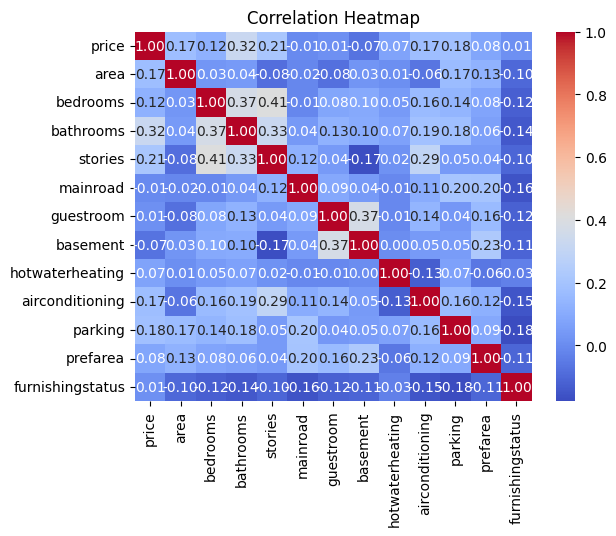

In [80]:
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm' ,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
col1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x = df[col1]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.17874098120743886
Mean Squared Error: 0.36480628755084094
R^2 Score: 0.11598259494691787


In [91]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.8625843354670225
Mean Squared Error: 0.575130302040935
R^2 Score: -0.1875680143511418


In [93]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.9845402946644849
Mean Squared Error: 0.9718012958510271
R^2 Score: -1.0066411579467234
